In [1]:
%matplotlib inline
import requests
import json
import ast
import string
import pandas as pd
import pymongo
from random import randint
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
# yourAPI = "abcdfAIzaSyC3lF94PxnSx34-WtKyRO_2ETFq-RSD2Ao"

In [2]:
def geoL(city_L, country_L, cities, state_L, state, lat, lng, country_code):#, Lat_Lon):
    Lat_Lon = []
    for count1 in range(0,len(city_L)):
        if country_L[count1] == "US":
            for count2 in range(0,len(cities)): 
                if city_L[count1] == cities[count2] and state_L[count1] == state[count2]:
                    Lat_Lon.append([lat[count2],lng[count2]])
                    break
                if count2 == len(cities)-1:
                    Lat_Lon.append(["",""]) 
        else:
            for count2 in range(0,len(cities)):
                if city_L[count1] == cities[count2]:
                    Lat_Lon.append([lat[count2],lng[count2]])
                    break
                if count2 == len(cities)-1:
                    for count in range(0,len(cities)):
                        if country_code[count] == country_L[count1]:
                            Lat_Lon.append([lat[count],lng[count]])
                            break
                        if count == len(cities)-1:
                            Lat_Lon.append(["",""])
    return Lat_Lon

In [3]:
def job_listofDic(job_categories):
    jobs_dic = {}
    jobs_L = []
    city_L = []
    country_L =[]
    state_L = []
    st = 0
    category_add_rem = []
    arr = []
    for job_cat in job_categories:
        raw_D = send_request(job_cat)    #aqui llamando a la funcion
        raw_D = json.loads(raw_D)
        jobs = raw_D["jobs"]             #esta lista contiene todos los roles que van a ser documents en el collection

        
        for job in jobs:
            jobs_dic["category"] = job["job_category"]
            jobs_dic["title"] = job["title"]
            jobs_dic["Job_ID"] = job["id_icims"]
            jobs_dic["City"] = job["city"]
            jobs_dic["Country"] = job["country_code"]

            city_L.append(job["city"])
            country_L.append(job["country_code"])
            statex = job["normalized_location"]

            state_L.append(addr(statex,st))           #aqui llamo a la funcion ADDR

            jobs_dic["Posted_date"] = job["posted_date"]
            jobs_dic["Description"] = job["description"]
            jobs_dic["Basic_Qualif"] = job["basic_qualifications"]
            jobs_dic["Preferred_Qualif"] = job["preferred_qualifications"]
            jobs_dic["Company"] = job["company_name"]
            jobs_dic["Apply"] = job["url_next_step"]
            jobs_L.append(jobs_dic.copy())
            
        for obj in collection.find():
            try:
                formaObj = obj["category"].lower()
                formaObj = re.sub("/", " ", formaObj)
                formaObj = re.sub("-", " ", formaObj)
                formaObj = formaObj.translate(str.maketrans('', '', string.punctuation))
                formaObj = re.sub(" +", " ", formaObj)
                formaObj = re.sub(" ", "-", formaObj)
            except:
                print("error", obj["Job_ID"])
                
            if formaObj == job_cat:
                arr.append(obj["Job_ID"])
        
    new_jobs = list(set(job_id_list) - set(arr))
    remove_jobs = list(set(arr) - set(job_id_list))
    category_add_rem.append([len(new_jobs),len(remove_jobs)])
            
    return jobs_L

In [4]:
geocoor = pd.read_csv("Final_Project/worldcities.csv")
cities = geocoor["city_ascii"].tolist()
country_code = geocoor["iso2"].tolist()
state = geocoor["admin_name"].tolist()
lat = geocoor["lat"].tolist()
lng = geocoor["lng"].tolist()

FileNotFoundError: [Errno 2] File b'Final_Project/worldcities.csv' does not exist: b'Final_Project/worldcities.csv'

In [5]:
job_categories = ["administrative-support",                    #01done
                  "audio-video-photography-production",        #02done
                 "business-merchant-development"]#,              #03done
#                  "business-intelligence",                      #04done
#                  "buying-planning-instock-management",         #05done
#                  "customer-service",                           #06done
#                  "data-science",                               #07done
#                  "database-administration",                    #08done
#                  "design",                                     #09done
#                  "economics",                                  #10done
#                  "editorial-writing-content-management",       #11done
#                  "facilities-maintenance-real-estate",         #12done
#                  "finance-accounting",                         #13done
#                  "fulfillment-operations-management",
#                  "fulfillment-warehouse-associate",
#                  "hardware-development",
#                  "human-resources",                            #17done
#                  "investigation-loss-prevention",
#                  "leadership-development-training",
#                  "legal",
#                  "machine-learning-science",                   #21done
#                  "marketing-pr",
#                  "medical-health-safety",
#                  "operations-it-support-engineering",          #24done
#                  "project-program-product-management-non-tech",#25done
#                  "public-policy",
#                  "research-science",                           #27done
#                  "sales-advertising-account-management",
#                  "software-development",                      #29done
#                  "solutions-architect",                        #30done
#                  "supply-chain-transportation-management",     #31done
#                  "systems-quality-security-engineering",       #32done
#                  "project-program-product-management-technical"] #33done

In [8]:
jobs_L = []
city_L = []
country_L = []
state_L = []
st = 0
for job_cat in job_categories:
    raw_D = send_request(job_cat)    #aqui llamando a la funcion
    raw_D = json.loads(raw_D)
    jobs = raw_D["jobs"]             #esta lista contiene todos los roles que van a ser documents en el collection
    
    jobs_dic = {}

    for job in jobs:
        jobs_dic["category"] = job["job_category"]
        jobs_dic["title"] = job["title"]
        jobs_dic["Job_ID"] = job["id_icims"]
        jobs_dic["City"] = job["city"]
        jobs_dic["Country"] = job["country_code"]
        
        city_L.append(job["city"])
        country_L.append(job["country_code"])
        statex = job["normalized_location"]
    
        state_L.append(addr(statex,st))           #aqui llamo a la funcion ADDR
        
        jobs_dic["Posted_date"] = job["posted_date"]
        jobs_dic["Description"] = job["description"]
        jobs_dic["Basic_Qualif"] = job["basic_qualifications"]
        jobs_dic["Preferred_Qualif"] = job["preferred_qualifications"]
        jobs_dic["Company"] = job["company_name"]
        jobs_dic["Apply"] = job["url_next_step"]
        jobs_L.append(jobs_dic.copy())

Response HTTP Status Code: 200


In [9]:
Lat_Lon = []
Lat_Lon = geoL(city_L, country_L, cities, state_L, state, lat, lng, country_code)#, Lat_Lon)
for x in range(0,len(jobs_L)):
    jobs_L[x].update( {"Geocoordinates": Lat_Lon[x]})

CONNECTING TO MONGODB 

In [6]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)


In [7]:
db = client.jobs
collection = db.roles

In [8]:
for job in jobs_L:
    collection.update({"Job_ID" : job["Job_ID"]},
              job,
              upsert = True)

NameError: name 'jobs_L' is not defined

In [64]:
#FETCHING DATA
arr = []
for obj in collection.find():
    if obj["category"]  == "Software Development":
        arr.append([obj["Basic_Qualif"],obj["Preferred_Qualif"]])

NATURAL LANGUAGE PROCESSING 

In [65]:
processed_arr = []
for roleD in arr:
    qualif = roleD[0] + " " + roleD[1]
    
    qualif = re.sub("\<.*?\>", " ", qualif)                              #Remove tags
    qualif = re.sub("/", " ", qualif)                                    #Remove /
    qualif = qualif.translate(str.maketrans('', '', string.punctuation)) #Remove punctuation
    qualif = re.sub("·", "", qualif)                                     #Remove periods
    qualif = ''.join(c for c in qualif if not c.isdigit())               #Remove numbers
    qualif = qualif.lower()                                              #Turn to lowercase
    processed_arr.append(qualif)        #nlp_arr contiene las quali

In [66]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
# from autocorrect import Speller

wordnet_lemmatizer = WordNetLemmatizer()
snowball_stemmer = SnowballStemmer("english")

ready_arr = []
for role_qual in processed_arr:
    res = nltk.word_tokenize(role_qual)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in res]
#     stemmed_word = [snowball_stemmer.stem(word) for word in lemmatized_word]
#     spells = [spell(w) for w in (stemmed_word)]
    dummy = ' '.join(lemmatized_word)
    ready_arr.append(dummy)
#     ready_arr.append(dummy)

[nltk_data] Downloading package punkt to /Users/marian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/marian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
added_stop_words = ["year","field","ability","related","using","employer","gender","equal","minority","sexual",\
                  "orientation","work","amazon","disability","concept","skill","language","team","tool","working",\
                  "building","highly","applied","problem","deep","including","presentation","equivalent","identity",\
                   "environment","relevant","track","set","strong","requirement","development","similar","role",\
                   "similar","big","verbal","large","result","model","knowledge","degree","complex","math","written",\
                   "excellent","able","abovementioned","academic", "female", "woman", "효율성", "aaa", "aac", "aap",\
                   "abathengi", "abb", "aber", "abgeschlossen", "ｉｔサービスマネジメントやｉｔビジネス運用等の経験",\
                   "ab", "abap", "abaqus", "ｉｔインフラの運用", "후보자는", "abgeschlossene", "abgeschlossenes", "abilità",\
                   "회의", "회의의", "효과적으로", "효율성등을", "효율적인", "ablility", "abschlussqualifikation", "화이트보딩",\
                   "환경의", "후보자", "abnormality", "aa", "aaai", "abahlukahlukileyo", "효율적으로", "활용한", "혹은",\
                   "aability", "환경에서", "현장", "aafa", "aat", "abgeschlossenem", "abgeschlossenem", "환경에서", "효과적인",\
                   "abhängig", "행사에서의", "현대", "현업", "현지", "협업을", "os", "support", "notwendige",'qualifikationen',\
  'abgeschlossene','kaufmännische','berufsausbildung','oder','relevante','berufserfahrung','bevorzugt','der',\
  'sachbearbeitung','mit','ausreichender','berufserfahrung','gleicher','bzw','ähnlicher','position','sehr','gute',\
  'kommunikations','und','konfliktfähigkeit','sowie','ausgeprägte','kundenorientierung','selbstständige','und',\
  'sorgfältige','arbeitsweise','sowie','ein','ausgeprägtes','organisationstalent','ausgeprägte','teamfähigkeit',\
  'und','hohe','serviceorientierung','sehr','gute','pckenntnisse','vorzugsweise','ms','office','insbesondere','sehr',\
  'gute','excelkenntnisse','begeisterung','im','umgang','mit','verschiedenen','und','neuen','systemen','gute',\
  'englischkenntnisse','wünschenswerte','qualifikationen','mindestens','jahr','erfahrung','gerne','einer',\
  'teamleiterfunktion','eines','operativen','bereiches','vorerfahrungen','im','bereich','der','personalsachbearbeitung',\
  'sind','sie','interessiert','wir','freuen','uns','darauf','von','ihnen','zu','hören','bitte','bewerben',\
  'sie','sich','unter','angabe','der','jobnummer','über','den','bewerberbutton','auf','unserer','website',\
  'sollten','die','bewerbungsunterlagen','nicht','vollständig','sein','anschreiben','lebenslauf','können','wir',\
  'ihre','bewerbung','leider','nicht','berücksichtigen','wir','wissen','dass','es','ihnen','wichtig','ist','wie',\
  'wir','ihre', 'persönlichen', 'daten', 'nutzen', 'und', 'schätzen', 'ihr', 'vertrauen', 'uns', 'dass', 'wir',\
  'diese','sorgfältig','und','gewissenhaft','behandeln','bitte','informieren','sie','sich','unserer','datenschutzerklärung',\
  'https','wwwamazonjobs','de','privacy','eu','um','mehr','darüber','zu','erfahren','wie','wir','personenbezogene',\
  'daten','unserer','bewerber','erheben','nutzen','und','übermitteln','amazon','ist','ein','arbeitgeber','der',\
  'chancengleichheit','fördert','und','fördermaßnahmen','zugunsten','benachteiligter','gruppen','bietet',"basic",\
    "qualifications","experience", "of", "years", "ea", "pa", "assistant", "given", "time", "assisting", "pc",\
    "computing", "located","mündlich", "schriftlich", "significance", "quantity","midcareer","considerably",\
    "portfolio", "yearround", "thoughtprovoking","nation","given","etre","older","time frequently", "older stand",\
    "employee issue", "classroom","localized", "instructional","adult","region site","legal","emergency","safety",\
    "specifically", "assumption","program","schedule","personal level","modern","design","science fundamental",\
    "software","professional software","ｉｔインフラの運用","ｉｔサービスマネジメントやｉｔビジネス運用等の経験","행사에서",\
    "solving","opportunity","skill","bachelor","service","age","understanding","proven","one","meet","etc",\
    "opportunityaffirmative","メール","everpositive","diary","person","quota","busdevemea","useful","教育レベル",\
    "einbringen","umfeldes","arbeitsumfeldes","problemlösungsfähigkeit","familiarizing","fixedterm","strongly",\
    "econometrics","encouraged background","strongly encouraged","task previous","adventure","completed","pride",\
    "walk","nicely","extended","reasonable","frequently","avoir","gone","gone volume","hourly","employee",\
    "wicklanderzulawski","demonstrate sound","conference","american","understandable","xpress","chef","new current",\
    "チャネル管理の経験","年以上の業務委託先が配送する物流業務の管理","preferred","well","based","action","requirement",\
    "demonstrated","effectively","level","across","humidity","new","ability","requirements","abilities","providing",\
    "least","holiday","holdiays","high"]

In [68]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

stop_words = text.ENGLISH_STOP_WORDS.union(added_stop_words)

# cv = CountVectorizer(stop_words = "english")
cv = CountVectorizer(stop_words = stop_words)
dataR = cv.fit_transform(ready_arr)

In [69]:
def wm2df(wm, feat_names):
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data = wm.toarray(), index = doc_names,
                      columns = feat_names)
    return(df)

In [70]:
df = wm2df(dataR, cv.get_feature_names())
dft = df.transpose()
df

,abenza,abreast,absence,absolute,absorb,abstract,abstraction,abstractl,abstractly,abuse,...,编译,習熟している方,能力和约束,能够处理模糊情况,複雑なソフトウェアアプリケーションを開発して顧客へ導入した経験を有する方,要件定義から実際のローンチまでのプロジェクト遂行能力のある方,要件定義やソフトウェア製品の機能定義,计算机相关专业,针对java,针对objectivec
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
top_dict = {}
for c in dft.columns:
    top = dft[c].sort_values(ascending = False).head(50)
    top_dict[c] = list(zip(top.index, top.values)) 

In [72]:
#imprime por role las 15 palabras mas comunes
# for role, top_words in top_dict.items():
#     print (role)
#     print(", ".join([word for word, count in top_words[0:14]]))
#     print("-------")

In [73]:
from collections import Counter

words = []
for role in dft.columns:
    top = [word for (word, count) in top_dict[role]]
    for t in top:
        words.append(t)
        
moc = Counter(words).most_common()

WORDCLOUDS

In [74]:
from wordcloud import WordCloud, STOPWORDS

In [75]:
dummyt = ' '.join(words)

In [76]:
wordcloud = WordCloud(relative_scaling = 1.0, max_words = 80, background_color = "white",\
                     colormap = "Dark2").generate(dummyt)

In [77]:
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig('git.png')
    plt.show()

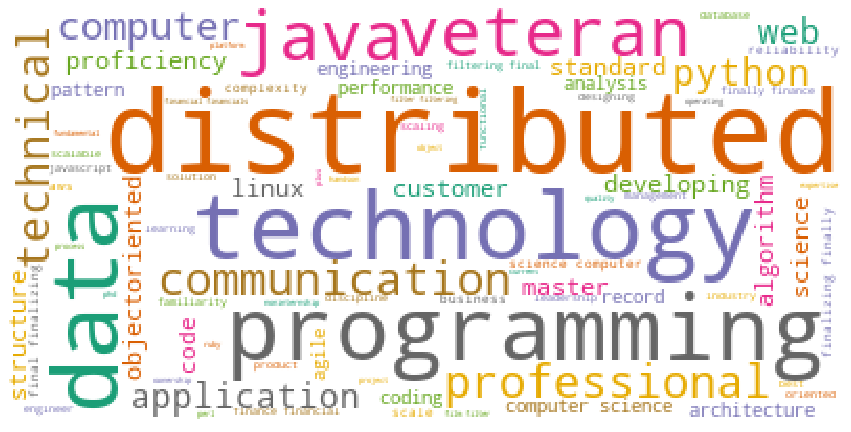

In [78]:
plot_wordcloud(wordcloud)

In [52]:
from PIL import Image
lupa = np.array(Image.open("../images/gh.png"))

In [53]:
lupa

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [59]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [60]:
transformed_lupa = np.ndarray((lupa.shape[0],lupa.shape[1]), np.int32)

for i in range(len(lupa)):
    transformed_lupa[i] = list(map(transform_format, lupa[i]))

In [61]:
transformed_lupa

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [62]:
wordcloud = WordCloud(relative_scaling = 1.0, max_words = 280, background_color = "white",\
                     colormap = "Dark2", mask = transformed_lupa, contour_width=1.2, contour_color='black').generate(dummyt)

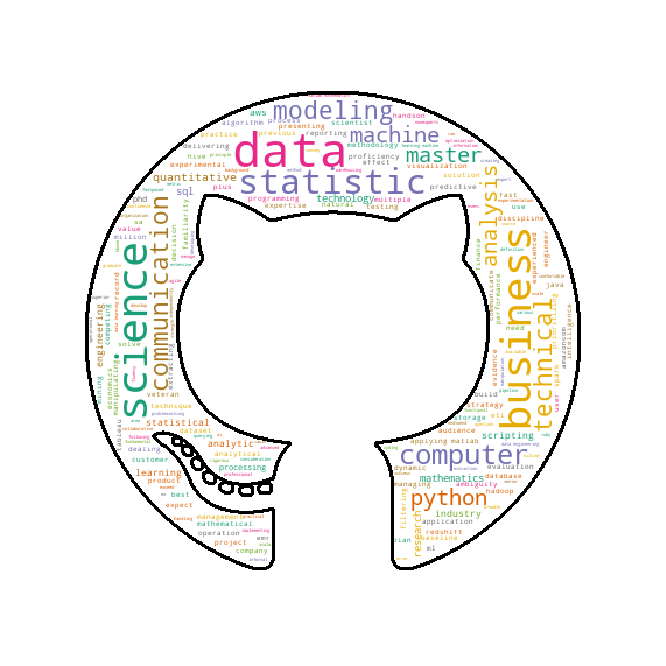

In [63]:
plot_wordcloud(wordcloud)

In [4]:
import textract
text = textract.process("Alejandro/Human Resources/Resumes/Alejandro_Escalante_R.pdf")

In [84]:
# text

In [6]:
type(text)

bytes

In [85]:
# str(text, 'utf-8')

In [17]:
jobs[0]["id_icims"]

'999771'

In [22]:
category_add_rem = []
arr = []
# for job_cat in job_categories:
#     raw_D = send_request(job_cat)    #aqui llamando a la funcion
#     raw_D = json.loads(raw_D)
#     jobs = raw_D["jobs"] 
    
#     job_id_list = []
#     for job in jobs:
#         job_id_list.append(job["id_icims"])
job_id_list = job_listofDic(job_categories)    

for obj in collection.find():
    try:
        formaObj = obj["category"].lower()
        formaObj = re.sub("/", " ", formaObj)
        formaObj = re.sub("-", " ", formaObj)
        formaObj = formaObj.translate(str.maketrans('', '', string.punctuation))
        formaObj = re.sub(" +", " ", formaObj)
        formaObj = re.sub(" ", "-", formaObj)
    except:
        print("error", obj["Job_ID"])
        
#     if formaObj == job_cat:
#         arr.append(obj["Job_ID"])
        
# new_jobs = list(set(job_id_list) - set(arr))
# remove_jobs = list(set(arr) - set(job_id_list))
# category_add_rem.append([len(new_jobs),len(remove_jobs)])

Response HTTP Status Code: 200
Response HTTP Status Code: 200


In [16]:
# job_id_list

In [40]:
dic_filled = {}
Jobs_filled = []
today = date.today()
j=0
for j in range(0,len(job_categories)):
    dic_filled["category"] = job_categories[j]
    dic_filled["#_Jobs_added"] = category_add_rem[j][0]
    dic_filled["#_Jobs_filled"] = category_add_rem[j][1]
    dic_filled["Date"] = today.strftime("%m/%d/%Y")
#     print(dic_filled.copy())
    Jobs_filled.append(dic_filled.copy())

In [11]:
# collection2 = db.filled
# collection2.insert(Jobs_filled)

In [50]:
for remove_job in remove_jobs:
    collection.delete_one({"Job_ID" : remove_job})

In [ ]:
for new_job in new_jobs:
    collection.insert_one({"Job_ID" : new_job})

In [40]:

category_add_rem = []
arr = []
for job_cat in job_categories:
    raw_D = send_request(job_cat)    #aqui llamando a la funcion
    raw_D = json.loads(raw_D)
    jobs = raw_D["jobs"]             #esta lista contiene todos los roles que van a ser documents en el collection
    
    jobs_L = []
    jobs_dic = {}
    city_L = []
    country_L =[]
    state_L = []
    st = 0
    arr = []
    job_ID_list = []
    
    for job in jobs:
        
        jobs_dic["category"] = job["job_category"]
        jobs_dic["title"] = job["title"]
        jobs_dic["Job_ID"] = job["id_icims"]
        jobs_dic["City"] = job["city"]
        jobs_dic["Country"] = job["country_code"]

        city_L.append(job["city"])
        country_L.append(job["country_code"])
        statex = job["normalized_location"]

        state_L.append(addr(statex, st))           #aqui llamo a la funcion ADDR

        jobs_dic["Posted_date"] = job["posted_date"]
        jobs_dic["Description"] = job["description"]
        jobs_dic["Basic_Qualif"] = job["basic_qualifications"]
        jobs_dic["Preferred_Qualif"] = job["preferred_qualifications"]
        jobs_dic["Company"] = job["company_name"]
        jobs_dic["Apply"] = job["url_next_step"]
#         jobs_dic["Geocoordinates"] = geoL(city_L, country_L, cities, state_L, state, lat, lng, country_code)
        job_ID_list.append(job["id_icims"])
        jobs_L.append(jobs_dic.copy())

    for obj in collection.find():
        try:
            formaObj = obj["category"].lower()
            formaObj = re.sub("/", " ", formaObj)
            formaObj = re.sub("-", " ", formaObj)
            formaObj = formaObj.translate(str.maketrans('', '', string.punctuation))
            formaObj = re.sub(" +", " ", formaObj)
            formaObj = re.sub(" ", "-", formaObj)
        except:
            print("error", obj["Job_ID"])

        if formaObj == job_cat:
            arr.append(obj["Job_ID"])

new_jobs = list(set(job_ID_list) - set(arr))
remove_jobs = list(set(arr) - set(job_ID_list))
category_add_rem.append([len(new_jobs),len(remove_jobs)])

Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response HTTP Status Code: 200
Response

In [41]:
Lat_Lon = geoL(city_L, country_L, cities, state_L, state, lat, lng, country_code)#, Lat_Lon)
for x in range(0,len(jobs_L)):
    jobs_L[x].update( {"Geocoordinates": Lat_Lon[x]})

In [24]:
len(new_jobs)

229

In [27]:
for new_job in new_jobs:
    for job in jobs_L:
        if new_job == job["Job_ID"]:
#             job.update({"Geocoordinates": Lat_Lon})
            collection.insert_one(job)

In [26]:
new_jobs

['1007831',
 '1005849',
 '1014652',
 '1010023',
 '1008430',
 '1010223',
 '1013373',
 '1004281',
 '1002555',
 '1010671',
 '1011822',
 '1002274',
 '1013302',
 '1007916',
 '1001536',
 '1006400',
 '980232',
 '979943',
 '1001499',
 '1010706',
 '1008245',
 '1010653',
 '1006591',
 '1013658',
 '1009152',
 '996326',
 '1007409',
 '1013210',
 '1004909',
 '1007749',
 '1010209',
 '1002731',
 '1010634',
 '1007891',
 '867705',
 '1010333',
 '1005463',
 '1004758',
 '1008498',
 '1004908',
 '998941',
 '1001579',
 '1003617',
 '1004212',
 '1005693',
 '1005940',
 '1005411',
 '1001603',
 '1014501',
 '1010973',
 '995826',
 '1003687',
 '1010164',
 '1006592',
 '946113',
 '1013106',
 '1005598',
 '1008135',
 '992974',
 '916599',
 '1000897',
 '989386',
 '1012237',
 '1010060',
 '1013677',
 '1005567',
 '996050',
 '1001325',
 '1004818',
 '1008044',
 '1006612',
 '1001589',
 '1014780',
 '997895',
 '1007428',
 '1011761',
 '1011816',
 '1008258',
 '918440',
 '1012236',
 '1014761',
 '1007017',
 '1014902',
 '1007892',
 '100

In [28]:
for new_job in new_jobs:
    collection.delete_one({"Job_ID" : new_job})